In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### EDA & Pre-Processing

In [4]:
df = pd.read_excel('fitness_data.xlsx')

In [5]:
df.head()

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
0,Akshay,10500,4500,7.5,80
1,Priya,9800,4200,7.2,75
2,Raj,11500,4800,7.0,90
3,Emily,12000,5000,7.8,85
4,Rohit,8900,4000,7.0,70


In [22]:
df.shape

(50, 5)

In [12]:
Q1, Q3 = df['sleep_duration(hours)'].quantile([0.25, 0.75])
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
lower, upper

(6.25, 8.25)

In [13]:
outliers = df[(df['sleep_duration(hours)'] < lower) | (df['sleep_duration(hours)'] > upper)]
outliers

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
21,Elena,11700,4900,18.0,100
30,Siddharth,11300,4700,4.0,75


In [14]:
df_corrected = df[(df['sleep_duration(hours)'] > lower) & (df['sleep_duration(hours)'] < upper)]
df_corrected.head()

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
0,Akshay,10500,4500,7.5,80
1,Priya,9800,4200,7.2,75
2,Raj,11500,4800,7.0,90
3,Emily,12000,5000,7.8,85
4,Rohit,8900,4000,7.0,70


In [42]:
df['calories_burned'].astype('float', inplace = True)

TypeError: NDFrame.astype() got an unexpected keyword argument 'inplace'

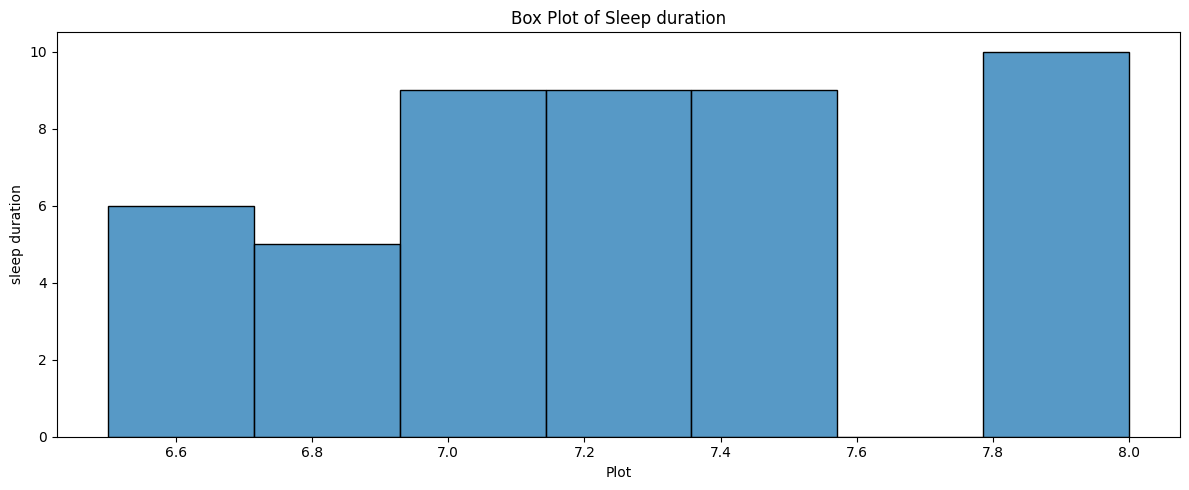

In [15]:
plt.figure(figsize=(12,5))
sns.histplot(df_corrected['sleep_duration(hours)'])

plt.title('Box Plot of Sleep duration')
plt.xlabel('Plot')
plt.ylabel('sleep duration')

plt.xticks = 45
plt.tight_layout()
plt.show()

#### Model Training and Testing

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [36]:
X = df.drop('calories_burned', axis = 'columns')
y = df['calories_burned']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [41]:
y_train

39    4200
2     4800
40    4700
32    4500
10    4600
21    4900
35    4300
27    4800
18    3900
31    4200
1     4200
12    4100
34    3900
45    4300
26    4600
5     4600
13    4300
22    4000
19    4300
17    4400
14    4700
4     4000
41    3800
33    4400
24    4700
11    4900
38    4000
16    4500
48    4500
46    4700
49    5500
8     4800
43    4900
29    4400
25    3800
28    4000
0     4500
15    4200
36    4600
9     3700
Name: calories_burned, dtype: int64